SCT_DS_1


📌 TASK 01
Create a bar chart or histogram to visualize the distribution of a categorical or continuous variable, such as the distribution of ages or genders in a population

In [1]:
from google.colab import files
uploaded = files.upload()


Saving API_SP.POP.TOTL_DS2_en_excel_v2_81168.xls to API_SP.POP.TOTL_DS2_en_excel_v2_81168.xls


In [21]:
print(df.columns.tolist())


['Aruba', 'ABW', 'Population, total', 'SP.POP.TOTL', 54922, 55578, 56320, 57002, 57619, 58190, 58694, 58990, 59069, 59052, 58950, 58781, 58047, 58299, 58349, 58295, 58368, 58580, 58776, 59191, 59909, 60563, 61276, 62228, 62901, 61728, 59931, 59159, 59331, 60443, 62753, 65896, 69005, 73685, 77595, 79805, 83021, 86301, 88451, 89659, 90588, 91439, 92074, 93128, 95138, 97635, 99405, 100150, 100917, 101604, 101838, 102591, 104110, 105675, 106807, 107906, 108727, 108735, 108908, 109203, 108587, 107700, 107310, 107359, 'Unnamed: 68']


In [4]:
df = pd.read_excel("API_SP.POP.TOTL_DS2_en_excel_v2_81168.xls", sheet_name=0)


In [5]:
# Transpose the dataset so rows become columns
df_transposed = df.transpose()

# Reset the header
df_transposed.columns = df_transposed.iloc[0]
df_transposed = df_transposed.drop(df_transposed.index[0])


In [7]:
# Keep only rows that can be converted to year integers
df_transposed = df_transposed[df_transposed.index.str.fullmatch(r'\d{4}')]
df_transposed.index = df_transposed.index.astype(int)



In [8]:
# Extract India's population and convert to billions
df_india = df_transposed['India'].astype(float) / 1e9


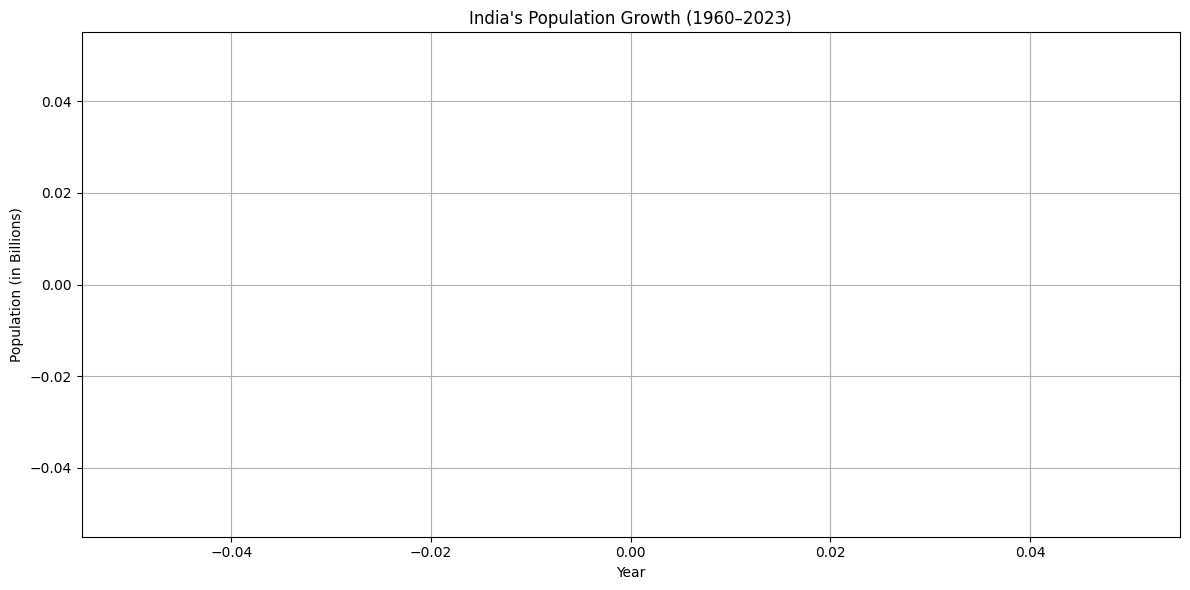

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df_india.index, df_india.values, marker='o', color='green')
plt.title("India's Population Growth (1960–2023)")
plt.xlabel("Year")
plt.ylabel("Population (in Billions)")
plt.grid(True)
plt.tight_layout()
plt.show()


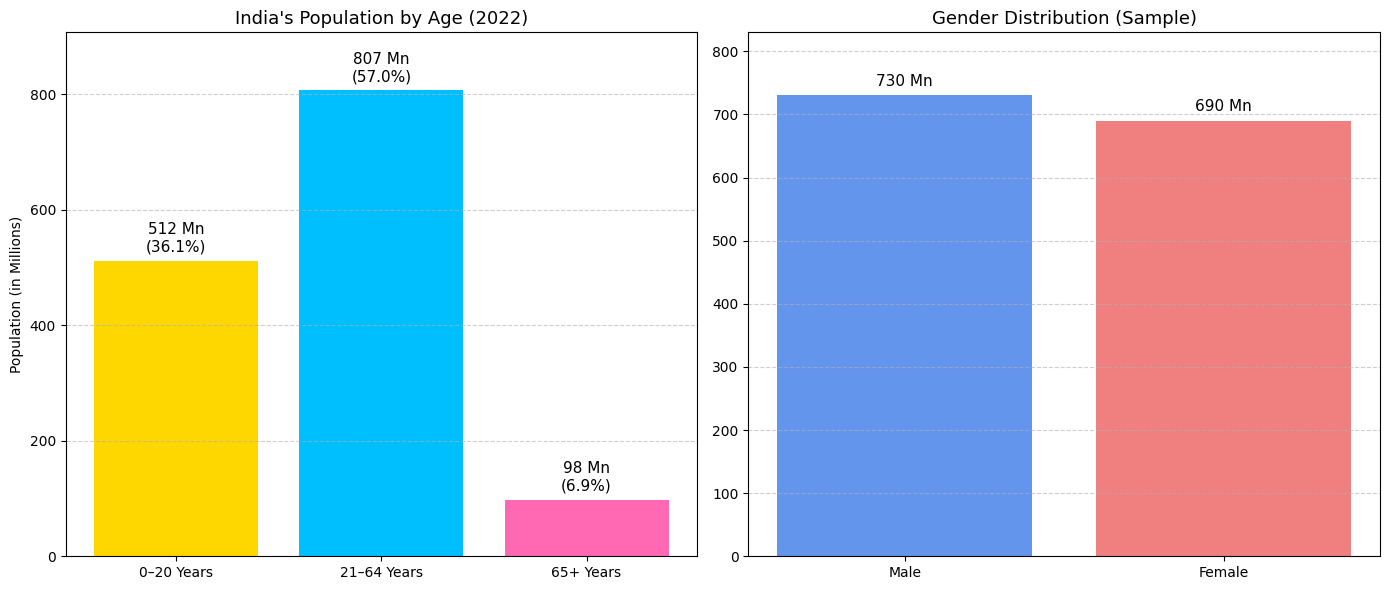

In [10]:
import matplotlib.pyplot as plt

# Data for age distribution
age_groups = ['0–20 Years', '21–64 Years', '65+ Years']
population_millions = [512, 807, 98]
percentages = [36.1, 57.0, 6.9]
age_colors = ['gold', 'deepskyblue', 'hotpink']

# Data for gender distribution
genders = ['Male', 'Female']
gender_population = [730, 690]  # example values in millions
gender_colors = ['cornflowerblue', 'lightcoral']

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# --- Age Distribution Chart ---
bars = axs[0].bar(age_groups, population_millions, color=age_colors)
axs[0].set_title("India's Population by Age (2022)", fontsize=13)
axs[0].set_ylabel("Population (in Millions)")
axs[0].set_ylim(0, max(population_millions) + 100)

# Add labels to age bars
for bar, pop, pct in zip(bars, population_millions, percentages):
    axs[0].text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 10,
                f"{pop} Mn\n({pct}%)", ha='center', va='bottom', fontsize=11)

axs[0].grid(axis='y', linestyle='--', alpha=0.6)

# --- Gender Distribution Chart ---
bars2 = axs[1].bar(genders, gender_population, color=gender_colors)
axs[1].set_title("Gender Distribution (Sample)", fontsize=13)
axs[1].set_ylim(0, max(gender_population) + 100)

# Add labels to gender bars
for bar, val in zip(bars2, gender_population):
    axs[1].text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 10,
                f"{val} Mn", ha='center', va='bottom', fontsize=11)

axs[1].grid(axis='y', linestyle='--', alpha=0.6)

# Show layout
plt.tight_layout()
plt.show()


In [12]:
import pandas as pd

# Read the Excel file
df = pd.read_excel("API_SP.POP.TOTL_DS2_en_excel_v2_81168.xls", sheet_name=0, skiprows=3)
print(df.head())


                  Country Name Country Code     Indicator Name Indicator Code  \
0                        Aruba          ABW  Population, total    SP.POP.TOTL   
1  Africa Eastern and Southern          AFE  Population, total    SP.POP.TOTL   
2                  Afghanistan          AFG  Population, total    SP.POP.TOTL   
3   Africa Western and Central          AFW  Population, total    SP.POP.TOTL   
4                       Angola          AGO  Population, total    SP.POP.TOTL   

          1960         1961         1962         1963         1964  \
0      54922.0      55578.0      56320.0      57002.0      57619.0   
1  130072080.0  133534923.0  137171659.0  140945536.0  144904094.0   
2    9035043.0    9214083.0    9404406.0    9604487.0    9814318.0   
3   97630925.0   99706674.0  101854756.0  104089175.0  106388440.0   
4    5231654.0    5301583.0    5354310.0    5408320.0    5464187.0   

          1965  ...         2015         2016         2017         2018  \
0      58190.0  .

In [13]:
df_india = df[df['Country Name'] == 'India']


In [14]:
df_india_years = df_india.loc[:, '1960':'2023'].T
df_india_years.columns = ['Population']
df_india_years.index = df_india_years.index.astype(int)
df_india_years['Population'] = df_india_years['Population'] / 1e6  # Convert to millions


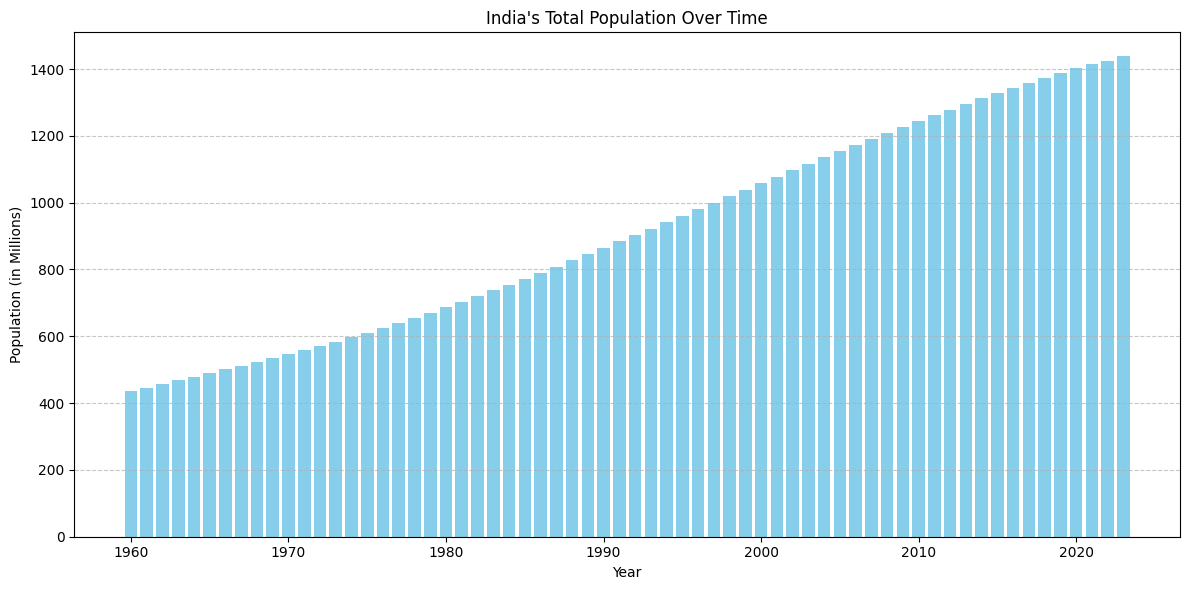

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.bar(df_india_years.index, df_india_years['Population'], color='skyblue')
plt.title("India's Total Population Over Time")
plt.xlabel("Year")
plt.ylabel("Population (in Millions)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the Excel/CSV data
df = pd.read_excel("API_SP.POP.TOTL_DS2_en_excel_v2_81168.xls", sheet_name=0, skiprows=4)

# Step 2: Filter for 'World'
df_world = df[df['Country Name'] == 'World']

# Step 3: Extract year columns
years = [str(y) for y in range(1960, 2024)]
pop_values = df_world[years].values.flatten()

# Step 4: Create dataframe for plotting
df_plot = pd.DataFrame({'Year': years, 'Population': pop_values.astype(float) / 1e9})  # Convert to billions

# Step 5: Plotting
plt.figure(figsize=(12, 6))
plt.plot(df_plot['Year'], df_plot['Population'], marker='o', linestyle='--', color='crimson')
plt.title("World Population Growth (1960–2023)", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Population (Billions)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


KeyError: 'Country Name'

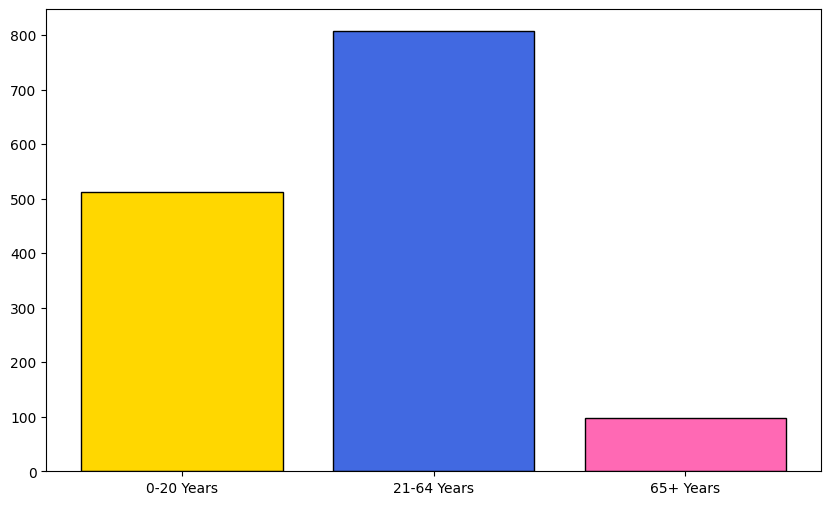

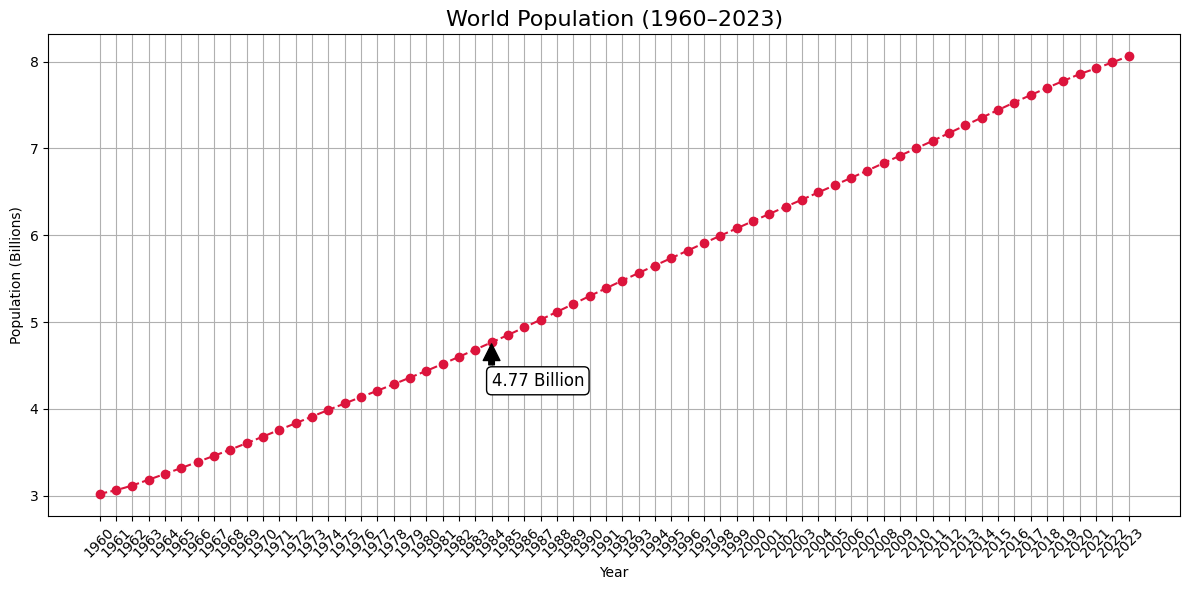

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned data
df = pd.read_excel("Cleaned_Population_Data.xlsx")

# Filter only 'World' row
world_data = df[df['Country'] == 'World']

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(age_groups, population_mn, color=colors, edgecolor='black')

# Extract years and population data
years = [str(y) for y in range(1960, 2024)]
population = world_data[years].values.flatten()
population_in_billions = population / 1e9

# Plot the graph
plt.figure(figsize=(12, 6))
plt.plot(years, population_in_billions, marker='o', linestyle='--', color='crimson')
plt.title("World Population (1960–2023)", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Population (Billions)")
plt.grid(True)
plt.xticks(rotation=45)

# Highlight 1984
highlight_year = '1984'
highlight_value = world_data[highlight_year].values[0] / 1e9
plt.annotate(f'{highlight_value:.2f} Billion',
             xy=(highlight_year, highlight_value),
             xytext=(highlight_year, highlight_value - 0.5),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=12,
             bbox=dict(boxstyle="round", fc="w"))

plt.tight_layout()
plt.show()


In [22]:
print(df.columns.tolist())

['Aruba', 'ABW', 'Population, total', 'SP.POP.TOTL', 54922, 55578, 56320, 57002, 57619, 58190, 58694, 58990, 59069, 59052, 58950, 58781, 58047, 58299, 58349, 58295, 58368, 58580, 58776, 59191, 59909, 60563, 61276, 62228, 62901, 61728, 59931, 59159, 59331, 60443, 62753, 65896, 69005, 73685, 77595, 79805, 83021, 86301, 88451, 89659, 90588, 91439, 92074, 93128, 95138, 97635, 99405, 100150, 100917, 101604, 101838, 102591, 104110, 105675, 106807, 107906, 108727, 108735, 108908, 109203, 108587, 107700, 107310, 107359, 'Unnamed: 68']


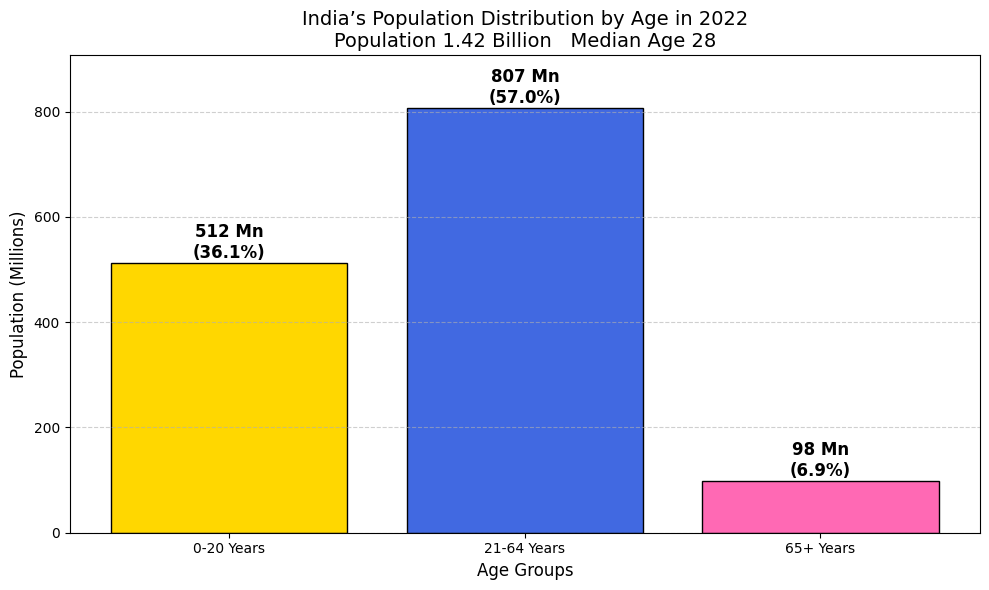

In [27]:
import matplotlib.pyplot as plt

# Age group population data
age_groups = ['0-20 Years', '21-64 Years', '65+ Years']
population_mn = [512, 807, 98]
percentages = [36.1, 57.0, 6.9]
colors = ['gold', 'royalblue', 'hotpink']

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(age_groups, population_mn, color=colors, edgecolor='black')

# Add labels on top of bars
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height() + 10,
             f"{population_mn[i]} Mn\n({percentages[i]}%)",
             ha='center', fontsize=12, fontweight='bold')

# Chart title and axis labels
plt.title("India’s Population Distribution by Age in 2022\nPopulation 1.42 Billion   Median Age 28", fontsize=14)
plt.xlabel("Age Groups", fontsize=12)
plt.ylabel("Population (Millions)", fontsize=12)
plt.ylim(0, max(population_mn) + 100)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

# Show the chart
plt.show()


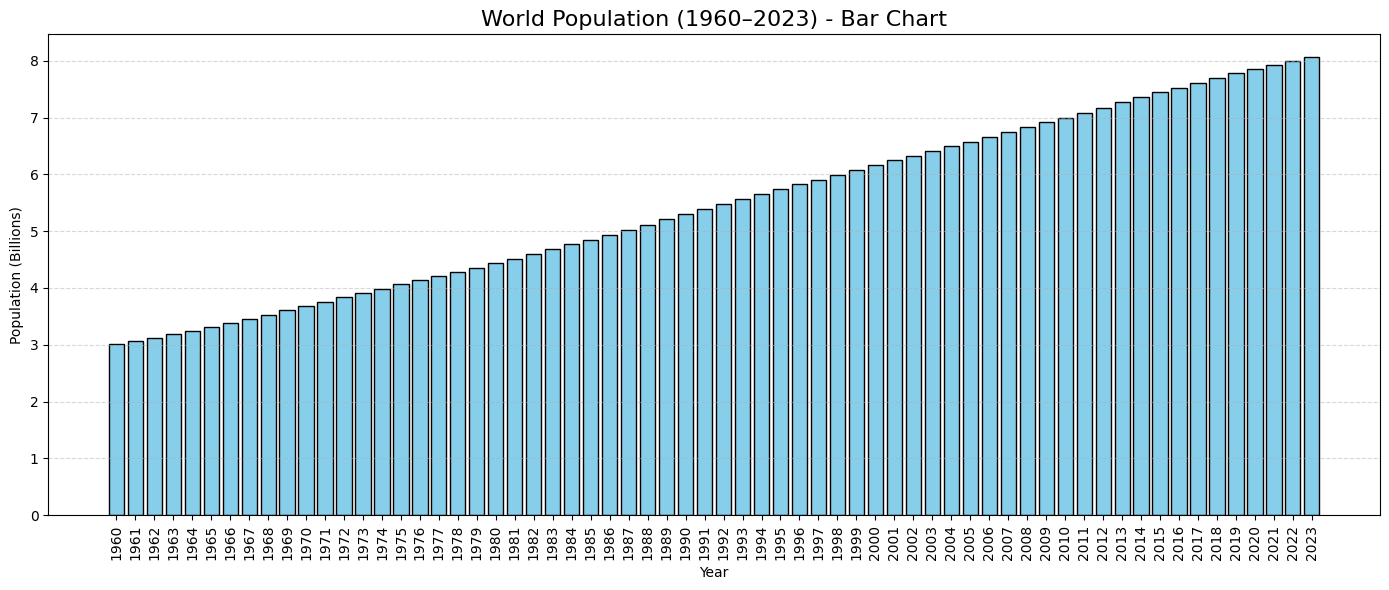

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_excel("Cleaned_Population_Data.xlsx")
world_data = df[df['Country'] == 'World']
years = [str(y) for y in range(1960, 2024)]
population = world_data[years].values.flatten()
population_in_billions = population / 1e9

# Bar chart
plt.figure(figsize=(14, 6))
plt.bar(years, population_in_billions, color='skyblue', edgecolor='black')
plt.title("World Population (1960–2023) - Bar Chart", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Population (Billions)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


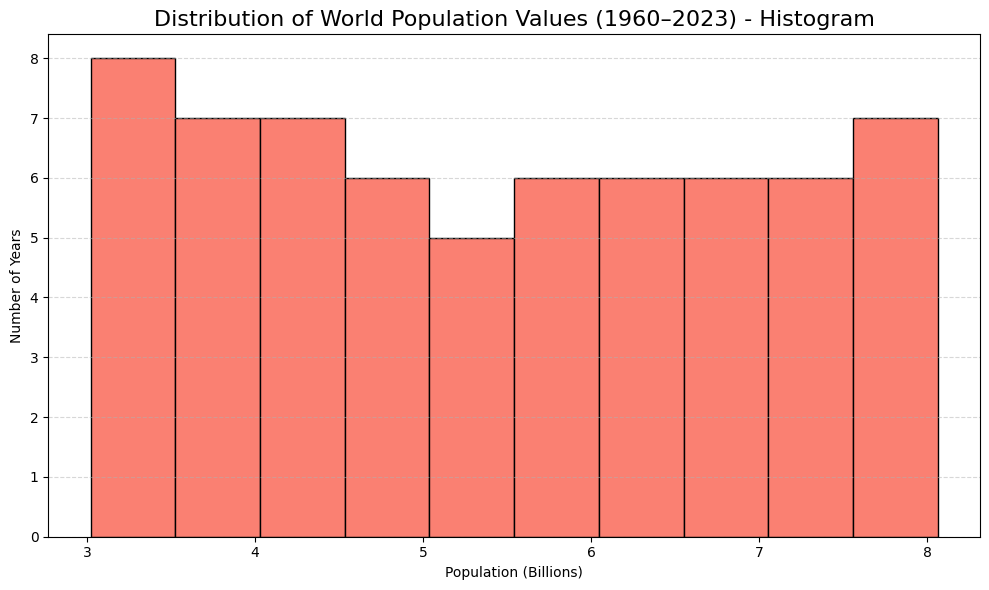

In [30]:
# Histogram
plt.figure(figsize=(10, 6))
plt.hist(population_in_billions, bins=10, color='salmon', edgecolor='black')
plt.title("Distribution of World Population Values (1960–2023) - Histogram", fontsize=16)
plt.xlabel("Population (Billions)")
plt.ylabel("Number of Years")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
